In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Simple Regulation vs NAR

In [73]:
alpha = 0.23
beta = 1.2
K = 0.6
incr = 0.1
num_timestamps = 250

In [10]:
def SR(alpha, beta, num_timestamps):
    y = [0]*(1+num_timestamps)
    for i in range(1, 1+num_timestamps):
        y[i] = y[i-1] + (beta - alpha*y[i-1]) * incr
    return np.array(y)

In [21]:
def NAR(alpha, beta, n, K, num_timestamps):
    y = [0]*(1+num_timestamps)
    for i in range(1, 1+num_timestamps):
        r = beta/ (1 + (y[i-1]/K)**n)
        y[i] = y[i-1] + (r - alpha*y[i-1]) * incr
    return np.array(y)

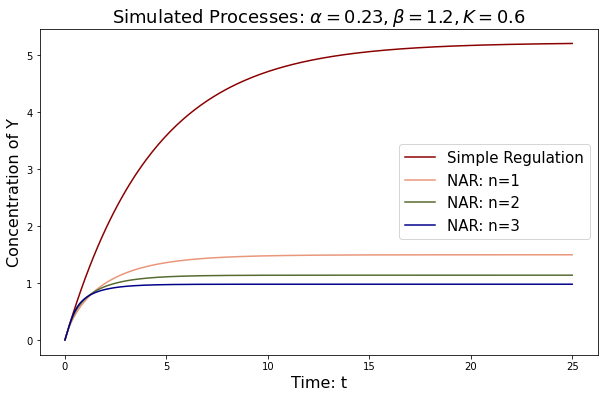

In [74]:
plt.figure(figsize=(10,6))
time = incr*np.arange(1+num_timestamps)
plt.plot(time, SR(alpha,beta,num_timestamps), color="darkred", label='Simple Regulation')
for n,c in zip(range(1,4),['darksalmon','darkolivegreen','darkblue']):
    plt.plot(time, NAR(alpha,beta,n,K,num_timestamps), color=c, label='NAR: n='+str(n))
plt.xlabel('Time: t', fontsize=16)
plt.ylabel('Concentration of Y', fontsize=16)
plt.title(r'Simulated Processes: $\alpha=0.23, \beta=1.2, K=0.6$', fontsize=18)
plt.legend(loc='right', fontsize=15)
plt.show()

# Hill Input Functions

In [56]:
def Hill(X, beta, n, K):
    return beta * X**n / (K**n + X**n)

In [60]:
K = 0.77
beta = 2
upper = 1.5

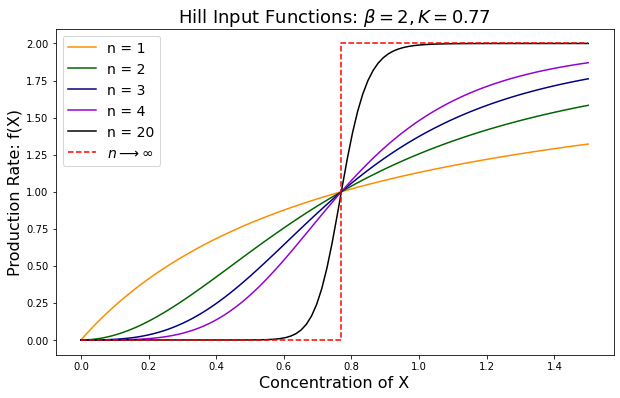

In [72]:
plt.figure(figsize=(10,6))
x = np.linspace(0, upper, 100)
for n,c in zip(range(1,5), ['darkorange','darkgreen','navy','darkviolet']):
    plt.plot(x, Hill(x,beta,n,K), color=c, label='n = '+str(n))
plt.plot(x, Hill(x,beta,20,K), color='black', label='n = 20')
plt.plot([0,K,K,upper],[0,0,beta,beta], linestyle='dashed', color='red', label=r'$n \longrightarrow \infty$')
plt.xlabel('Concentration of X', fontsize=16)
plt.ylabel('Production Rate: f(X)', fontsize=16)
plt.title(r'Hill Input Functions: $\beta=2, K=0.77$', fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.show()